In [7]:
from daltonize.daltonize import *
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
import os


In [3]:
# 이미지 경로
my_img= 'my_image/20120213171413_7831.jpeg'

In [28]:
# 이미지 경로 (if dir)
samples_cub = glob('../../../cil/data/CUB_200_2011/images/016.Painted_Bunting/*')

In [124]:
samples_cub[40]

'../../../cil/data/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0040_16691.jpg'

## CVD Simulation & Daltonization

In [8]:
gamma = 2.4
typ = 'd'

def simulation(input_image, output_image):
    """
    input_image : input image 경로
    output_image : simulated image 저장 경로
    """
    
    if not os.path.exists(output_image):
        os.makedirs(output_image)
    
    orig_img = np.asarray(Image.open(input_image).convert('RGB'), dtype=np.float16)
    orig_img = gamma_correction(orig_img, gamma)
    
    simul_rgb = simulate(orig_img, typ)
    simul_img = array_to_img(simul_rgb, gamma)
    simul_img.save(output_image)
    
    return simul_img
    

def daltonization(input_image, output_image):
    """
    input_image : input image 경로 (original image)
    output_image : daltonized image 저장 경로
    """
    
    if not os.path.exists(output_image):
        os.makedirs(output_image)
    
    orig_img = np.asarray(Image.open(input_image).convert("RGB"), dtype=np.float16)
    orig_img = gamma_correction(orig_img, gamma)
    
    dalton_rgb = daltonize(orig_img, typ)
    dalton_img = array_to_img(dalton_rgb, gamma)
    dalton_img.save(output_image)
    
    return dalton_img

In [9]:
def compare_orig_and_daltonized(input_image, simulated_image='./simulated.jpg', daltonized_image='./daltonized.jpg', simulated_daltonized_image='./simulated_daltonized.jpg'):
    """
    input_image : original image 경로
    simulated_image : 원본의 simulated image 저장 경로
    daltonized_image : 원본의 daltonized image 저장 경로
    simulated_daltonized_image : daltonized image의 simulated image 저장 경로
    """
    
    simulated = simulation(input_image, simulated_image)
    daltonized = daltonization(input_image, daltonized_image)
    sim_dal = simulation(daltonized_image, simulated_daltonized_image)
    
    plt.figure()
    original = plt.imread(input_image)
    plt.imshow(original)
    plt.title('original')
    
    plt.figure()
    plt.imshow(simulated)
    plt.title('simulated (original)')
    
    plt.figure()
    plt.imshow(daltonized)
    plt.title('daltonized')
    
    plt.figure()
    plt.imshow(sim_dal)
    plt.title('simulated (daltonized)')
    
    print(f"original image: {input_image}\nsimulated image: {simulated_image}\ndaltonized image: {daltonized_image}\nsimulated image of daltonized image: {simulated_daltonized_image}")

original image: my_image/20120213171413_7831.jpeg
simulated image: ./test_simulated.jpg
daltonized image: ./test_daltonized.jpg
simulated image of daltonized image: ./test_simulated_daltonized.jpg


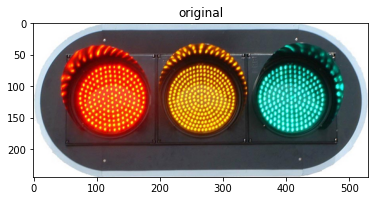

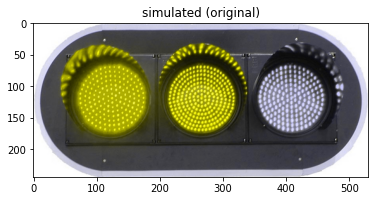

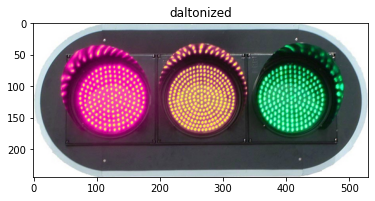

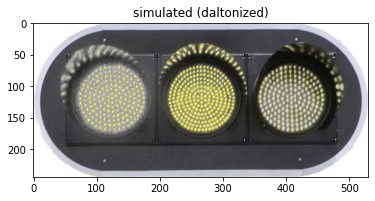

In [6]:
# sample 이미지 한 번에 확인하기
compare_orig_and_daltonized(my_img, "./test_simulated.jpg", "./test_daltonized.jpg", "./test_simulated_daltonized.jpg")

## CVD Simulation (무시하세요)

In [127]:
sim_fig = simulate(sample_cub)

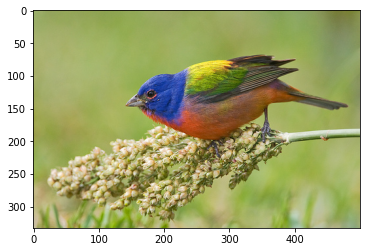

In [128]:
plt.imshow(sample_cub)

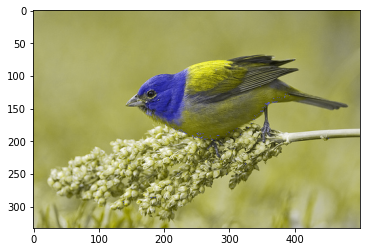

In [129]:
plt.imshow(sim_fig.astype('uint8'))

## 

In [3]:
input_image = my_daltonized_img
gamma = 2.4
typ = 'd'
dal_output_image = './daltonized_sample_5.jpg'
sim_output_image = './simulated_sample_of_daltonized_5.jpg'

simulation = True
daltonization = False


orig_img = np.asarray(Image.open(input_image).convert("RGB"), dtype=np.float16)
orig_img = gamma_correction(orig_img, gamma)

if simulation:
    simul_rgb = simulate(orig_img, typ)
    simul_img = array_to_img(simul_rgb, gamma)
    simul_img.save(sim_output_image)
if daltonization:
    dalton_rgb = daltonize(orig_img, typ)
    dalton_img = array_to_img(dalton_rgb, gamma)
    dalton_img.save(dal_output_image)

NameError: name 'my_daltonized_img' is not defined

In [4]:
input_image = '../../../cil/data/CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0028_15205.jpg'
gamma = 2.4
typ = 'd'
output_image = './daltonized_sample.jpg'

simulation = True
daltonization = True


orig_img = np.asarray(Image.open(input_image).convert("RGB"), dtype=np.float16)
orig_img = gamma_correction(orig_img, gamma)

if simulation:
    simul_rgb = simulate(orig_img, typ)
    simul_img = array_to_img(simul_rgb, gamma)
    simul_img.save(output_image)
if daltonization:
    dalton_rgb = daltonize(orig_img, typ)
    dalton_img = array_to_img(dalton_rgb, gamma)
    dalton_img.save(output_image)

NameError: name 'np' is not defined

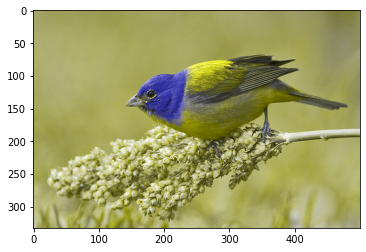

In [133]:
fig = plt.figure()
fig = plt.imshow(simul_img)

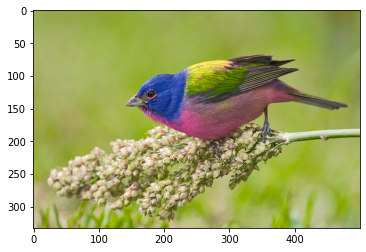

In [132]:
plt.imshow(dalton_img)